In [4]:
from IPython.display import Image

In [ ]:
# Confidence vs. Credibility: 

# Frequentists: consider probability as a measure of frequency out of
# repeated events. (Model parameters = fixed, data = random)
# Bayesians: consider probability as degree of certainty about values.
# (Model parameters = random, data = fixed)

In [2]:
# EXAMPLE 1 - Mean of Gaussian Distribution. (by conf/cred intervals)

# PROBLEM: observing the brightness of a star (constant brightness).
# This is num photons reaching telescope in one second. Has
# measurement errors. Observations of photons xi are drawn (say)
# from Normal distribution centered around true mean brightness
# with stddev sigma_x. 

# FIND the 95 confidence interval to place on brightness of star?

In [3]:
### 1. FREQUENTIST APPROACH:

# mean - sampling mean of the sampling distribution of the 
# observed frequency of light photons. Is normal by Central Limit 
# Theorem.
# Sampling Distribution - has mean and standard error (sigma over
# sqrt N)

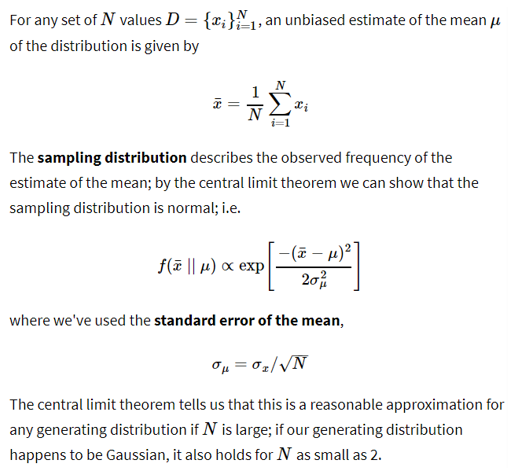

In [6]:
Image(filename="images/3_samplingdist.png")

In [9]:
# Checking CLT empirically: 

import numpy as np

N = 5
numSamples = 10**6 # of size N = 5)
sigma_x = 2 # true population standard deviation

np.random.seed(0)
x = np.random.normal(0, sigma_x, size=(numSamples, N))

mu_samp = x.mean(1)
sig_samp = sigma_x * N ** -0.5

print("Sample stderror of observed means = {0:.3f} should equal "
      "formula stdderror = {1:.3f}"
      .format(np.std(mu_samp), sig_samp))

Sample stderror of observed means = 0.894 should equal formula stdderror = 0.894


In [11]:
# now the 95% confidence interval is two standard deviations
# around the mean. 
# CI_mu = (x-bar - 2stdderror, x-bar + 2stdderror)

# suppose we have 3 observations with error (sigma_x = 10). 
# # Then the conf int is:
true_B = 100
sigma_x = 10 # true population standard deviation
np.random.seed(1)
data = np.random.normal(true_B, sigma_x, size=3)
print(data)

[ 116.24345364   93.88243586   94.71828248]


In [15]:
from scipy.special import erfinv

def frequentistConfIntTrueMean(data, sigma, level=0.95):
    """Compute confidence interval for true population mean"""
    mu = data.mean() # true mean = sampling dist mean
    sigma_mu = sigma * data.size ** -0.5 # sigma = true pop.stddev
    Nsigma = np.sqrt(2) * erfinv(level) # WHAT does this one mean?
    return mu - Nsigma * sigma_mu, mu + Nsigma * sigma_mu


print("95% confidence interval: ({0:.0f}, {1:.0f})"
      .format(*frequentistConfIntTrueMean(data, sigma_x)))

95% confidence interval: (90, 113)


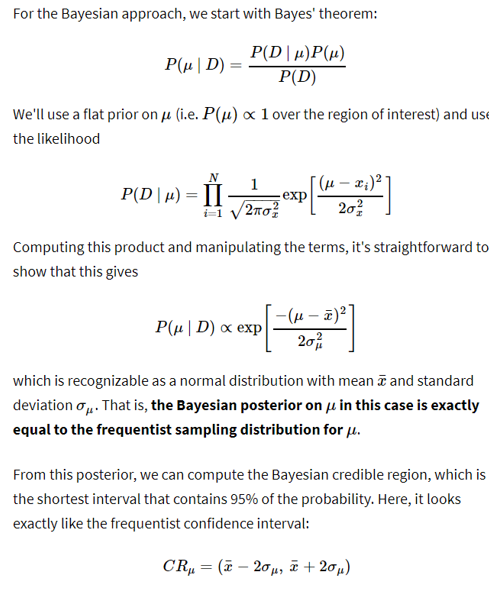

In [17]:
# 1. BAYESIAN APPROACH: for credible interval

Image(filename="images/3_bayescredibleinterval.png")

In [18]:
def bayesConfIntTrueMean(data, sigma, level=0.95):
    """Compute credible region onthe mean."""
    Nsigma = np.sqrt(2) * erfinv(level)
    mu = data.mean()
    sigma_mu = sigma * data.size ** -0.5
    
    return mu - Nsigma * sigma_mu, mu + Nsigma * sigma_mu

print("95% credible region: ({0:.0f}, {1:.0f})"
      .format(*bayesConfIntTrueMean(data, sigma_x)))

95% credible region: (90, 113)


In [19]:
# Numerically equivalent but interpretations (only) differ: 


# Bayes credible region interpretation: "Given the observed data,
# there is 95% probability that the true population mean falls within
# the credible interval". 
# --- statement of probability of parameter value given fixed bounds.

# Frequentist confidence interpretation: "There is 95% probability
# that when I compute the confidence interval from data, the
# true population mean will fall within the interval."
# --- statement is a probability about the bounds given fixed parameter.

In [ ]:
### CONFIRMING THE INTERPRETATION OF BAYES CREDIBLE REGION: 

# TODO: 
# 1. sample random mu values from the prior
# 2. sample random sets of points given each mu. 
# 3. select the points matching observed data. 
# 4. ask what fraction of the mu values are within the credible
# region we make.

In [28]:
# 0. defining quantities we need: 
Nsamples = 2E7
N = len(data)
sigma_x = 10 # population

# checking: if someone changes N, this can cause memory error:
if N * Nsamples > 1E8:
    raise ValueError("Are you sure you want this many samples?")

# epsilon says how close to the data we must be to consider it
# a matching sample. Encodes trade between bias and variance of
# the simulation. 
epsilon = 0.5 

# 1. generate mean values from the flat prior (in a reasonable range).
np.random.seed(0)
mu = 80 + 40 * np.random.random(Nsamples)


# 2. generate data for each of the mean values
x = np.random.normal(mu, sigma_x, (N, Nsamples)).transpose()

# 3. find data matching our "observed" data
x.sort(1)
data.sort()
i = np.all(abs(x - data) < epsilon, 1)
print("number of suitable samples: {0}".format(sum(i)))



# 4. ask how many of the mu's fall in the credible range
muInCredible = mu[i]
CR = bayesConfIntTrueMean(data, sigma_x)
musWithinCR = (CR[0] < muInCredible) & (muInCredible < CR[1])

print("Fraction of means in Credible Region: {0:.3f}"
      .format(sum(musWithinCR) / musWithinCR.size))

# (answer should be 0.949) - roughly 95% of mus in data match ours
# in the credible region. 

# NOTE ABOUT BAYES: we compute a "single credible region from
# observed data", and we consider it in "multiple random draws of mu." 

TypeError: 'float' object cannot be interpreted as an integer

In [30]:
### CONFIRMING INTERPRETATION OF FREQUENTIST CONFIDENCE INTERVAL: 

# 1. draw sets of values from distribution defined by true mean. 
# 2. for each set of values, compute new confint. 
# 3. determine what frac of this intervals contain mu. 

# 0. define quantities
N = len(data)
Nsamples = 1E4
mu = 100
sigma_x = 10


# 1. draw data sets from true distribution
np.random.seed(0)
x = np.random.normal(mu, sigma_x, (Nsamples, N))

# 2. compute confi int for each datasaet
CIs = np.array([frequentistConfIntTrueMean(Di, sigma_x) for Di in x])

# 3. find which confints contain true mean
musWithinCR = (CIs[:, 0] < mu) & (mu < CIs[:, 1])

print("Fraction of Confidence Intervals containing the mean: {0:.3f}"\
    .format(sum(musWithinCR) / musWithinCR.size))


# NOTE about frequentist: single value true mean and consider it
# in relation to multiple confints made from multiple random
# data samples.

TypeError: 'float' object cannot be interpreted as an integer

In [32]:
## OVERALL:

# Bayes approach fixes the region + guarantees 95% of mus fall
# within it. 
# Frequentist approach fixes the parameter + guarantees 95% of
# confints will contain it. 

# MEANING:

# Bayes treats parameters (mu) as random variables
# FREQ treats parameters fixed. 

# Bayes treats observed data fixed 
# FREQ treats data as random variables. 

# Bayes treats parameter contrains (CR) fixed
# Freq treats constraints as random variables. 